##Nowcast Green Linear PCA Mode 1
###January 2016

In [ ]:
import numpy as np
import xarray as xr
import os
import datetime
from salishsea_tools import viz_tools
from scipy.io import loadmat, savemat
from dateutil.parser import parse
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Make lon, lat arrays
T = xr.open_dataset('/results/SalishSea/nowcast-green/01apr16/SalishSea_1h_20160401_20160401_grid_T.nc')
mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DMeshMask2V1')
tmask = mask.tmask.isel(time=0, gridZ=0)
tmask[750:, :] = 0
tmask[:350, :] = 0
tmask[:, :100] = 0
tmask = tmask[::10, ::10].stack(z=('gridX', 'gridY')).values.astype(bool)
lon = T.nav_lon[::10, ::10].stack(z=('x', 'y')).values[tmask]
lat = T.nav_lat[::10, ::10].stack(z=('x', 'y')).values[tmask]

In [22]:
PCA = loadmat('/ocean/bmoorema/research/MEOPAR/analysis-ben/scripts/PCA1.mat')
TSu = PCA['u'].real.T
TSv = PCA['u'].imag.T
PCu, PCv = viz_tools.rotate_vel(PCA['xi'].real, PCA['xi'].imag)

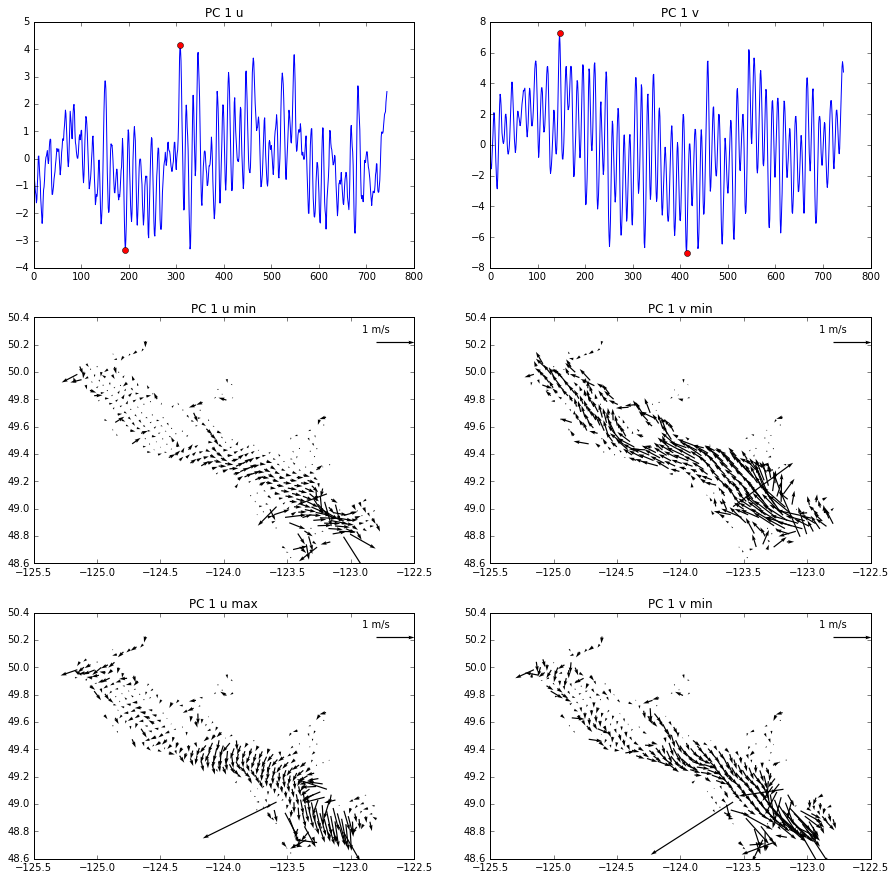

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

imin = TSu.argmin()
imax = TSu.argmax()
ax[0, 0].plot(TSu)
ax[0, 0].plot(imin, TSu[imin], 'ro')
ax[0, 0].plot(imax, TSu[imax], 'ro')
ax[0, 0].set_title('PC 1 u')

Q1 = ax[1, 0].quiver(lon, lat, PCu[:, imin], PCv[:, imin], scale=10)
plt.quiverkey(Q1, 0.9, 0.9, 1, '1 m/s')
ax[1, 0].set_title('PC 1 u min')
Q2 = ax[2, 0].quiver(lon, lat, PCu[:, imax], PCv[:, imax], scale=10)
plt.quiverkey(Q2, 0.9, 0.9, 1, '1 m/s')
ax[2, 0].set_title('PC 1 u max')

imin = TSv.argmin()
imax = TSv.argmax()
ax[0, 1].plot(TSv)
ax[0, 1].plot(imin, TSv[imin], 'ro')
ax[0, 1].plot(imax, TSv[imax], 'ro')
ax[0, 1].set_title('PC 1 v')

Q3 = ax[1, 1].quiver(lon, lat, PCu[:, imin], PCv[:, imin], scale=10)
plt.quiverkey(Q3, 0.9, 0.9, 1, '1 m/s')
ax[1, 1].set_title('PC 1 v min')
Q4 = ax[2, 1].quiver(lon, lat, PCu[:, imax], PCv[:, imax], scale=10)
plt.quiverkey(Q4, 0.9, 0.9, 1, '1 m/s')
ax[2, 1].set_title('PC 1 v min')